In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import pymannkendall as mk
import matplotlib.pyplot as plt
import matplotlib
#import statsmodels.api as sm
%matplotlib inline
import glob
import os
import seaborn as sns
# import chart_studio.plotly as py
import plotly.graph_objs as go

In [2]:
# combining the dataframes
# defining the function arguments for data processing
path = r"D:\Work\Box Sync\Trends_all states\Population_DP05\\"
pattern = "ACSDP5Y" + "*.DP05-Data.csv" # file name pattern to list and read them
colNames10_12 = ['Geography', 'Geographic Area Name', 'Estimate!!SEX AND AGE!!Total population',
        'Percent!!HISPANIC OR LATINO AND RACE!!Total population',
        'Percent!!HISPANIC OR LATINO AND RACE!!Hispanic or Latino (of any race)',
        'Percent!!HISPANIC OR LATINO AND RACE!!Not Hispanic or Latino!!White alone',
        'Percent!!HISPANIC OR LATINO AND RACE!!Not Hispanic or Latino!!Black or African American alone',
        'Percent!!HISPANIC OR LATINO AND RACE!!Not Hispanic or Latino!!American Indian and Alaska Native alone',
        'Percent!!HISPANIC OR LATINO AND RACE!!Not Hispanic or Latino!!Asian alone',
        'Percent!!HISPANIC OR LATINO AND RACE!!Not Hispanic or Latino!!Native Hawaiian and Other Pacific Islander alone',
        'Percent!!HISPANIC OR LATINO AND RACE!!Not Hispanic or Latino!!Some other race alone',
        'Percent!!HISPANIC OR LATINO AND RACE!!Not Hispanic or Latino!!Two or more races']
colNames13_16 =['Geography', 'Geographic Area Name', 'Estimate!!SEX AND AGE!!Total population',
       'Percent!!HISPANIC OR LATINO AND RACE!!Total population',
       'Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)',
       'Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!White alone',
       'Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Black or African American alone',
       'Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!American Indian and Alaska Native alone',
       'Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Asian alone',
       'Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Native Hawaiian and Other Pacific Islander alone',
       'Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Some other race alone',
       'Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races']

colNames17_18 = ['Geography', 'Geographic Area Name', 'Estimate!!SEX AND AGE!!Total population', 
'Percent Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)',
'Percent Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!White alone',
'Percent Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Black or African American alone',
'Percent Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!American Indian and Alaska Native alone',
'Percent Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Asian alone',
'Percent Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Native Hawaiian and Other Pacific Islander alone',
'Percent Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Some other race alone',
'Percent Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races']

colNames19_20 =['Geography', 'Geographic Area Name', 'Estimate!!SEX AND AGE!!Total population',
       'Percent!!HISPANIC OR LATINO AND RACE!!Total population',
       'Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)',
       'Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!White alone',
       'Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Black or African American alone',
       'Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!American Indian and Alaska Native alone',
       'Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Asian alone',
       'Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Native Hawaiian and Other Pacific Islander alone',
       'Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Some other race alone',
       'Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races']

newNames = ['GEOID', 'NAME', 'Total population', 'Hispanic or Latino',  'White alone','Black or African American alone',
        'American Indian and Alaska Native alone', 'Asian alone', 'Native Hawaiian and Other Pacific Islander alone',
        'Some other race alone', 'Two or more races']
# List of the files that match the pattern
population_files = glob.glob(path + pattern) # listing file names with the pattern


In [3]:
# the file has two headers, deleting the 2nd header and renaming columns to more understandable form
files_map1 = map(lambda filename: pd.read_csv(filename, index_col = None, 
                                             usecols = colNames10_12, 
                                             # names = newNames,
                                             header = 1, engine='python'), population_files[:3])

files10_12 = list(files_map1)
for i in range(len(files10_12)):
    globals()[f"df_{i}"] = files10_12[i]
    

files_map2 = map(lambda filename: pd.read_csv(filename, index_col = None, 
                                             usecols = colNames13_16,
                                             # names = newNames,
                                             header = 1, engine='python'), population_files[3:7])

files13_16 = list(files_map2)
for i in range(len(files13_16)):
    globals()[f"df_{i+3}"] = files13_16[i]
    
    
files_map3 = map(lambda filename: pd.read_csv(filename, index_col = None, 
                                             usecols = colNames17_18,
                                             # names = newNames,
                                             header = 1, engine='python'), population_files[7:9])
files17_18 = list(files_map3)
for i in range(len(files17_18)):
    globals()[f"df_{i+7}"] = files17_18[i]


files_map4 = map(lambda filename: pd.read_csv(filename, index_col = None, 
                                             usecols = colNames19_20,
                                             # names = newNames,
                                             header = 1, engine='python'), population_files[9:])

files19_20 = list(files_map4)
for i in range(len(files19_20)):
    globals()[f"df_{i+9}"] = files19_20[i]

In [4]:
df = df_0.merge(df_1.merge(df_2.merge(df_3.merge(df_4.merge(df_5.merge(df_6.merge(df_7.merge(df_8.merge(df_9.merge(df_10,
                                                                                                              on = 'Geography' , how = 'outer', suffixes = ('_19', '_20')),  
                                                                                                    on = 'Geography' , how = 'outer', suffixes = ('_18', '_19')),  
                                                                                         on = 'Geography' , how = 'outer', suffixes = ('_17', '_18')),  
                                                                              on = 'Geography' , how = 'outer', suffixes = ('_16', '_17')),  
                                                                   on = 'Geography' , how = 'outer', suffixes = ('_15', '_16')),  
                                                        on = 'Geography' , how = 'outer', suffixes = ('_14', '_15')), 
                                            on = 'Geography' , how = 'outer', suffixes = ('_13', '_14')), 
                                 on = 'Geography' , how = 'outer', suffixes = ('_12', '_13')), 
                      on = 'Geography' , how = 'outer', suffixes = ('_11', '_12')), 
                on = 'Geography', how = 'outer', suffixes=('_10', '_11'))


In [5]:
df.replace('-', np.nan, inplace = True)

In [6]:
num_cols = df[df.columns[df.columns.to_series().str.contains('HISPANIC OR LATINO AND RACE')]].columns
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')
#df.dtypes

In [7]:
# df[df.columns[df.columns.to_series().str.contains('HISPANIC OR LATINO AND RACE')]].columns

In [8]:
#df.columns
# 'Hispanic or Latino'
df['Total']= df[df.columns[df.columns.to_series().str.contains('Estimate!!SEX AND AGE!!Total population')]].values.tolist()
df['Hispanic or Latino']= df[df.columns[df.columns.to_series().str.contains('(of any race)')]].values.tolist()
df['White']= df[df.columns[df.columns.to_series().str.contains('White alone')]].values.tolist()
df['Black or African American']= df[df.columns[df.columns.to_series().str.contains('Black or African American alone')]].values.tolist()
df['American Indian and Alaska Native']= df[df.columns[df.columns.to_series().str.contains('American Indian and Alaska Native alone')]].values.tolist()
df['Asian']= df[df.columns[df.columns.to_series().str.contains('Asian alone')]].values.tolist()
df['Native Hawaiian and Other Pacific Islander']= df[df.columns[df.columns.to_series().str.contains('Native Hawaiian and Other Pacific Islander alone')]].values.tolist()
df['Some Other Race']= df[df.columns[df.columns.to_series().str.contains('Some other race alone')]].values.tolist()
df['Two or more races']= df[df.columns[df.columns.to_series().str.contains('Two or more races')]].values.tolist()


C:\Users\uttar\AppData\Local\Temp\ipykernel_4008\2761776754.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Total']= df[df.columns[df.columns.to_series().str.contains('Estimate!!SEX AND AGE!!Total population')]].values.tolist()
C:\Users\uttar\AppData\Local\Temp\ipykernel_4008\2761776754.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['Hispanic or Latino']= df[df.columns[df.columns.to_series().str.contains('(of any race)')]].values.tolist()
C:\Users\uttar\AppData\Local\Temp\ipykernel_4008\2761776754.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consid

In [9]:
df.loc[:, 'Hispanic or Latino_10_16'] = df['Hispanic or Latino'].map(lambda x: np.mean(x[:-4]))
df.loc[:, 'Hispanic or Latino_17_20'] = df['Hispanic or Latino'].map(lambda x: np.mean(x[-4:]))

df.loc[:, 'White_10_16'] = df['White'].map(lambda x: np.mean(x[:-4]))
df.loc[:, 'White_17_20'] = df['White'].map(lambda x: np.mean(x[-4:]))

df.loc[:, 'Black or African American_10_16'] = df['Black or African American'].map(lambda x: np.mean(x[:-4]))
df.loc[:, 'Black or African American_17_20'] = df['Black or African American'].map(lambda x: np.mean(x[-4:]))

df.loc[:, 'American Indian and Alaska Native_10_16'] = df['American Indian and Alaska Native'].map(lambda x: np.mean(x[:-4]))
df.loc[:, 'American Indian and Alaska Native_17_20'] = df['American Indian and Alaska Native'].map(lambda x: np.mean(x[-4:]))

df.loc[:, 'Asian_10_16'] = df['Asian'].map(lambda x: np.mean(x[:-4]))
df.loc[:, 'Asian_17_20'] = df['Asian'].map(lambda x: np.mean(x[-4:]))

df.loc[:, 'Native Hawaiian and Other Pacific Islander_10_16'] = df['Native Hawaiian and Other Pacific Islander'].map(lambda x: np.mean(x[:-4]))
df.loc[:, 'Native Hawaiian and Other Pacific Islander_17_20'] = df['Native Hawaiian and Other Pacific Islander'].map(lambda x: np.mean(x[-4:]))

df.loc[:, 'Some Other Race_10_16'] = df['Some Other Race'].map(lambda x: np.mean(x[:-4]))
df.loc[:, 'Some Other Race_17_20'] = df['Some Other Race'].map(lambda x: np.mean(x[-4:]))

df.loc[:, 'Two or more races_10_16'] = df['Two or more races'].map(lambda x: np.mean(x[:-4]))
df.loc[:, 'Two or more races_17_20'] = df['Two or more races'].map(lambda x: np.mean(x[-4:]))

C:\Users\uttar\AppData\Local\Temp\ipykernel_4008\2345956177.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[:, 'Hispanic or Latino_10_16'] = df['Hispanic or Latino'].map(lambda x: np.mean(x[:-4]))
C:\Users\uttar\AppData\Local\Temp\ipykernel_4008\2345956177.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[:, 'Hispanic or Latino_17_20'] = df['Hispanic or Latino'].map(lambda x: np.mean(x[-4:]))
C:\Users\uttar\AppData\Local\Temp\ipykernel_4008\2345956177.py:4: PerformanceWarning: DataFrame is highly fragmented. 

In [10]:
df['GEOID'] = df['Geography'].str[9:]

C:\Users\uttar\AppData\Local\Temp\ipykernel_4008\3679526705.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['GEOID'] = df['Geography'].str[9:]


In [11]:
# df[['GEOID', 'Geographic Area Name', 'Hispanic or Latino', 'White', 'Black or African American',]]
#        'American Indian and Alaska Native', 'Asian',
#        'Native Hawaiian and Other Pacific Islander', 'Some Other Race',
#        'Two or more races', 'Total']]

In [12]:
places_US =  gpd.read_file(r'D:\Work\Box Sync\Trends_all states\Maps_2020\compiled.shp')
df_with_geom = places_US.merge(df, on = 'GEOID')

In [13]:
immigration_data = gpd.read_file(r'D:\Work\Box Sync\Trends_all states\Output from Analysis\immigration_data.shp')

In [14]:
immigration_data[immigration_data['msa_total'] < 1000]

,CSAFP,CBSAFP,GEOID,Metro,NAMELSAD,LSAD,MEMI,MTFCC,ALAND,AWATER,INTPTLAT,INTPTLON,%ImmPop,noImm,msa_total,geometry


In [15]:
# df_comb.plot()
US_states = gpd.read_file(r'D:\Work\Box Sync\Trends_all states\Maps_2020\cb_2020_us_state_5m.zip')  #tl_2020_us_state
# US_500cities = gpd.read_file(r'D:\Work\Box Sync\Trends_all states\Maps_2020\500Cities_City_11082016.zip')
US_urban = gpd.read_file(r'D:\Work\Box Sync\Trends_all states\Maps_2020\cb_2020_us_ua20_500k.zip') # tl_2022_us_uac10

In [16]:
# US_500cities = US_500cities.to_crs('EPSG:9311')
US_urban =US_urban.to_crs('EPSG:9311')

In [17]:
df1 = df_with_geom.to_crs('EPSG:9311') # [df_with_geom['STATEFP'].str.contains('30')]
df2 = immigration_data.to_crs('EPSG:9311') # [immigration_data['Metro'].str.contains('MT')]

df3 = df1.overlay(df2, how='intersection')

# fig, ax = plt.subplots(figsize=(20, 20))
# #df1.plot(ax = ax, alpha = 0.6)
# df2.plot(ax= ax, alpha = 0.5)
# df3.plot(ax= ax, alpha = 0.5, color = 'red')

C:\Users\uttar\miniforge3\envs\depopTrend\Lib\site-packages\geopandas\geodataframe.py:2469: UserWarning: `keep_geom_type=True` in overlay resulted in 1991 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  return geopandas.overlay(


In [18]:
df3.columns[160:]

Index(['Two or more races_17_20', 'CSAFP', 'CBSAFP', 'GEOID_2', 'Metro',
       'NAMELSAD_2', 'LSAD_2', 'MEMI', 'MTFCC_2', 'ALAND_2', 'AWATER_2',
       'INTPTLAT_2', 'INTPTLON_2', '%ImmPop', 'noImm', 'msa_total',
       'geometry'],
      dtype='object')

In [19]:
df3['%c_Hispanic'] = df3['Hispanic or Latino_17_20']- df3['Hispanic or Latino_10_16']
df3['%c_Asian'] = df3['Asian_17_20'] - df3['Asian_10_16']
df3['%c_White'] = df3['White_17_20'] - df3['White_10_16']
df3['%c_Black'] = df3['Black or African American_17_20'] - df3['Black or African American_10_16']
df3['%c_NH'] = df3['Native Hawaiian and Other Pacific Islander_17_20'] - df3['Native Hawaiian and Other Pacific Islander_10_16']
df3['%c_American Indian'] = df3['American Indian and Alaska Native_17_20'] - df3['American Indian and Alaska Native_10_16']
df3['%c_Some Other'] = df3['Some Other Race_17_20'] - df3['Some Other Race_10_16']
df3['%c_Two or more'] = df3['Two or more races_17_20'] - df3['Two or more races_10_16']

In [20]:
# df3[['NAME', 'Metro','%ImmPop','Hispanic or Latino_10_16','Hispanic or Latino_17_20', '%c_Hispanic', 
#      'Asian_10_16','Asian_17_20', '%c_Asian']].sort_values(['%c_Hispanic'], ascending = False).head(653)

In [21]:
df3['intersect_area'] = df3.area
df3['%area'] = df3['intersect_area']*100/df3['ALAND_1']

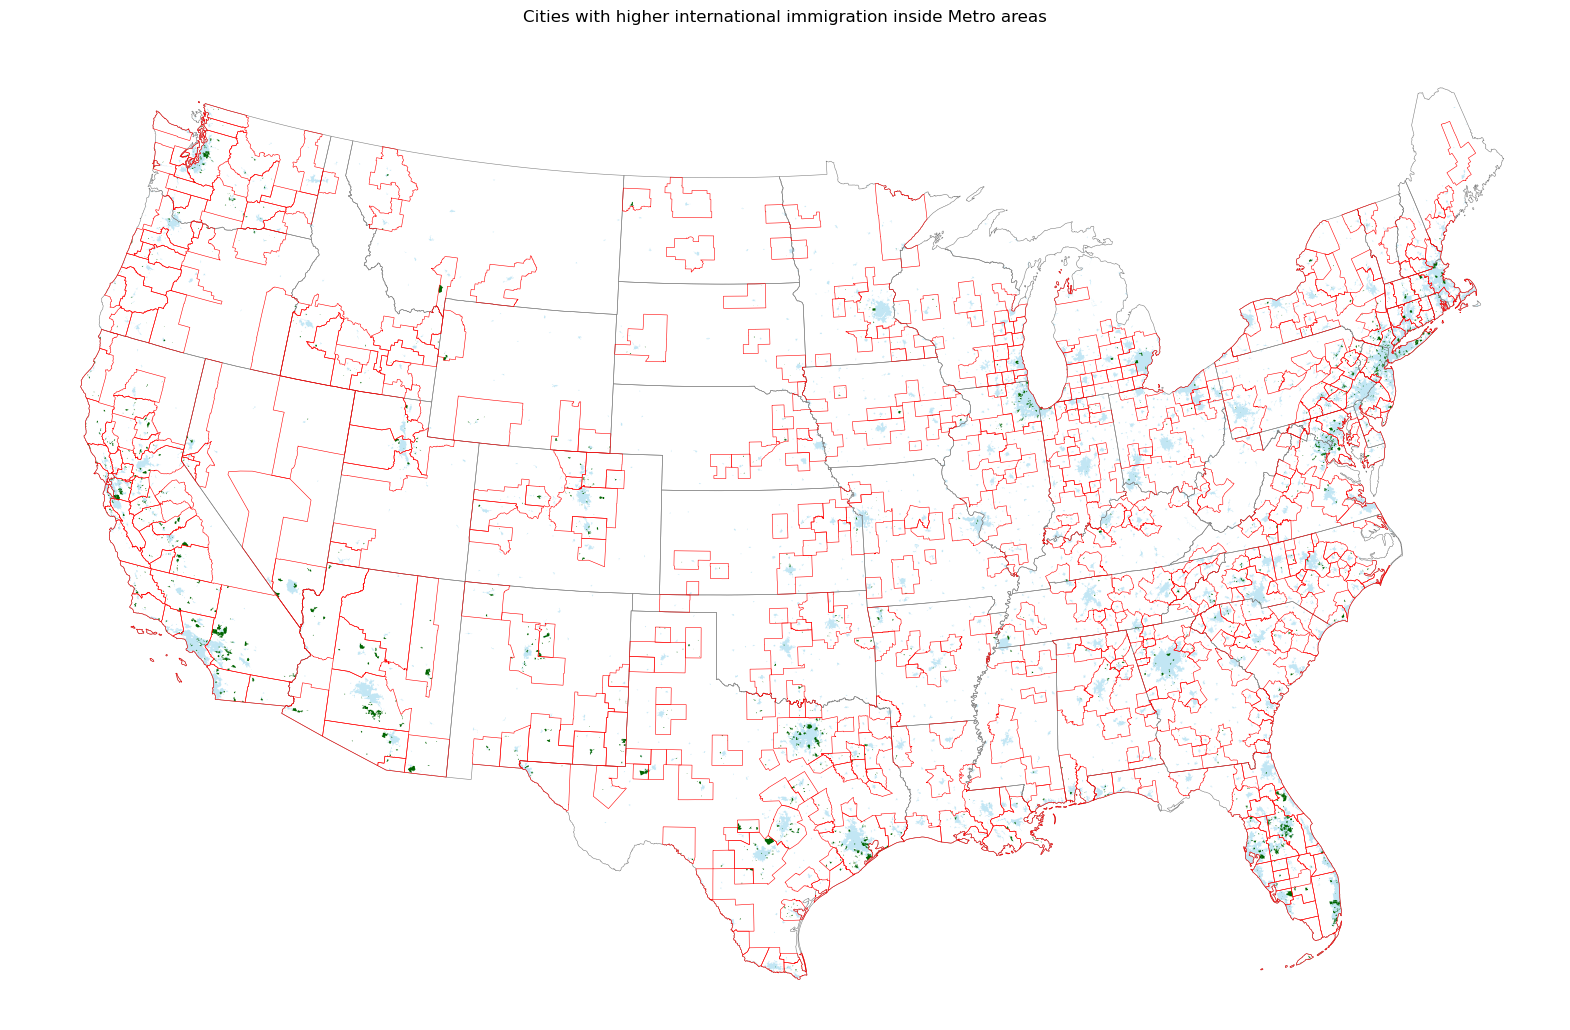

In [22]:
fig, ax = plt.subplots(figsize=(20, 20))
US_states.to_crs('EPSG:9311').boundary.plot(ax =ax, edgecolor = 'grey', linewidth = 0.4)
US_urban.to_crs('EPSG:9311').plot(ax =ax, color = 'skyblue', linewidth = 0.2, alpha = 0.5, legend = True)
immigration_data.to_crs('EPSG:9311').boundary.plot(ax= ax, color ='red', alpha = 1, linewidth = 0.4)
df3[(df3['%c_Asian'] >5) & (df3['%ImmPop'] >0)].to_crs('EPSG:9311').plot(ax = ax, alpha = 1, color = 'darkgreen', linewidth = 1, legend = True)
df3[(df3['%c_Hispanic'] >5) & (df3['%ImmPop'] >0)].to_crs('EPSG:9311').plot(ax = ax, alpha = 1, color = 'darkgreen', linewidth = 1, legend = True)

xlim = ([-2257388.37, 2695859.75]) 
ylim = ([-2246944.04, 918095.9])
ax.set_xlim(xlim)
ax.set_ylim(ylim)

# Add title and legend to plot
# ax.legend()
ax.set(title='Cities with higher international immigration inside Metro areas')
ax.set_axis_off()

plt.show()

# fig.savefig(r'D:\Work\Box Sync\Trends_all states\Output from Analysis\Figures\Cities with higher international immigration inside Metro areas.png', dpi = 300,
#            bbox_inches='tight', transparent="True", pad_inches=0)

In [23]:
df3[['STATEFP', 'PLACEFP', 'PLACENS', 'GEOID_1', 'NAME', 'NAMELSAD_1', 'Metro','%ImmPop',
       'noImm', 'msa_total', 'geometry', '%c_Hispanic', '%c_Asian',
       'intersect_area', '%area', '%c_White', '%c_Black', '%c_NH',
       '%c_American Indian', '%c_Some Other', '%c_Two or more']].to_csv(r'D:\Work\Box Sync\Trends_all states\Output from Analysis\racial_distn.csv')

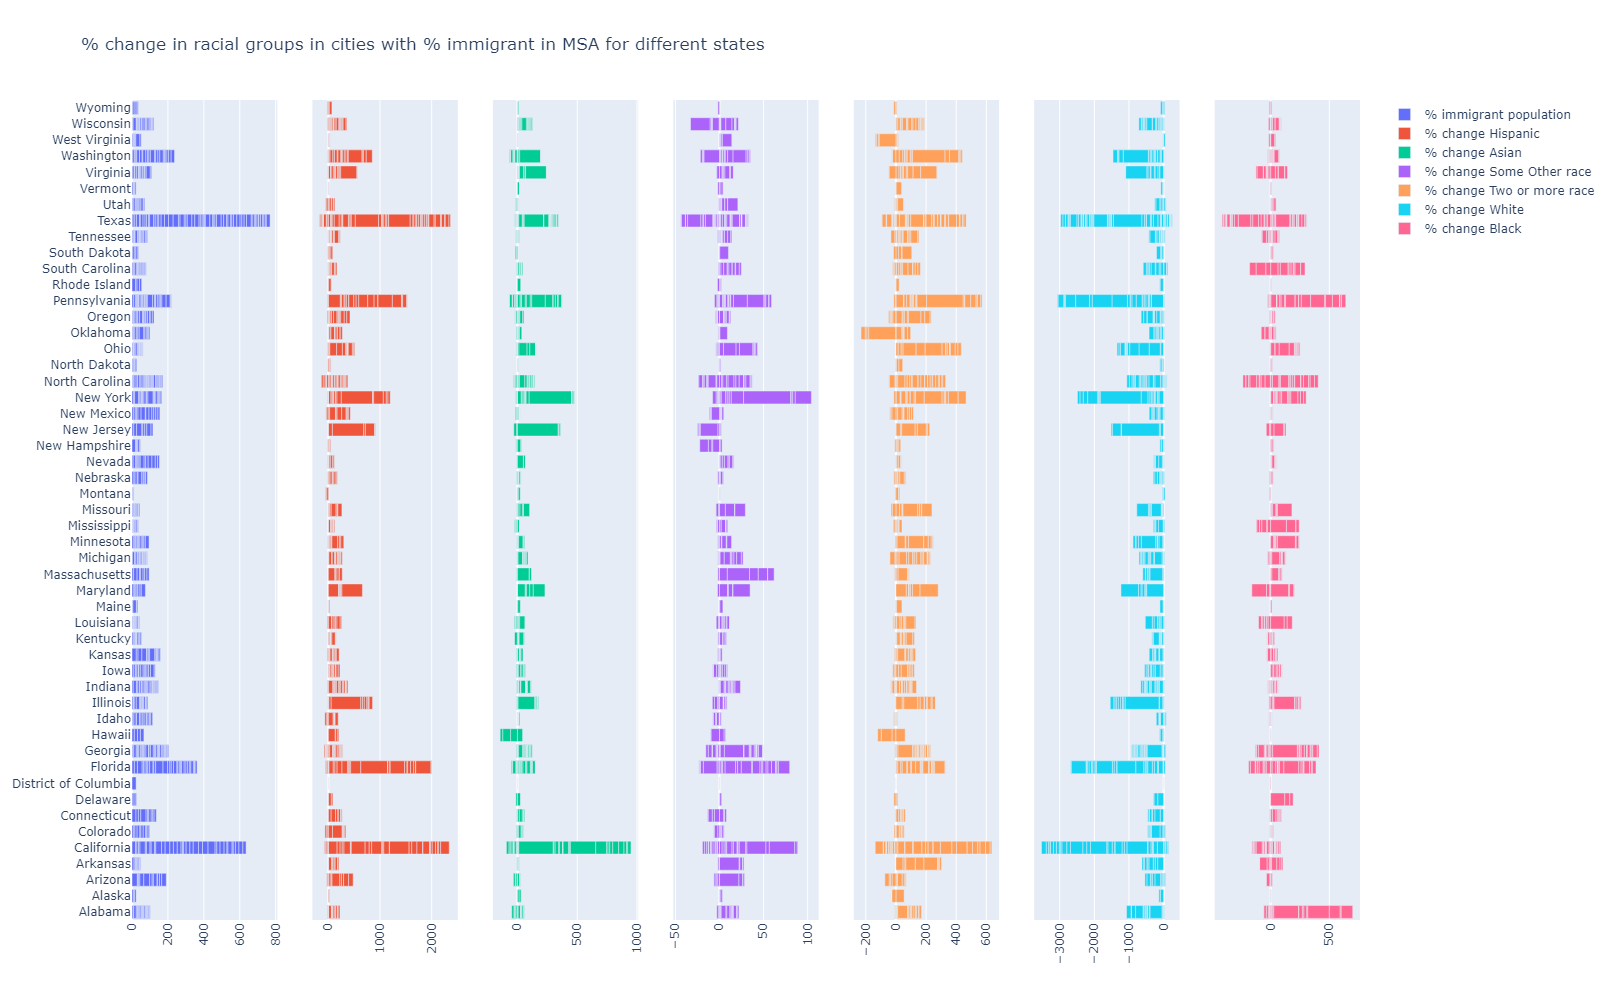

In [37]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
# import plotly.io as pio
# pio.kaleido.scope.default_format = "png"

state_names= US_states[['STATEFP', 'NAME']]

data = df3.groupby(['STATEFP', 'Metro'])[['%c_Hispanic','%c_Asian', '%c_White', '%c_Black', '%c_NH',
                                                           '%c_American Indian', '%c_Some Other',
                                                           '%c_Two or more',]].sum().reset_index()
data['%immigrant'] = df3.groupby(['STATEFP', 'Metro'])[['%ImmPop']].mean().values#.groupby(['STATEFP']).sum().values
data = data.merge(state_names, on = 'STATEFP')

#data = data.sort_values(['%immigrant'])
x = data['NAME']

fig = make_subplots(rows=1, cols=7,
                   shared_yaxes=True)

fig.append_trace(go.Bar(
            name='% immigrant population',
            x=data['%immigrant'],
            y=x,
            offsetgroup=0,
            orientation='h'
        ), row=1, col=1)

fig.append_trace( go.Bar(
            name="% change Hispanic",
            x=data['%c_Hispanic'],
            y=x,
            offsetgroup=0,
            orientation='h'
        ), row=1, col=2)

fig.append_trace(go.Bar(
            name="% change Asian",
            x=data['%c_Asian'],
            y=x,
            offsetgroup=0,
            orientation='h'
        ), row=1, col=3)

fig.append_trace(go.Bar(
            name='% change Some Other race',
            x=data['%c_Some Other'],
            y=x,
            offsetgroup=0,
            orientation='h'
        ), row=1, col=4)


fig.append_trace(go.Bar(
            name='% change Two or more race',
            x=data['%c_Two or more'],
            y=x,
            offsetgroup=0,
            orientation='h'
        ), row=1, col=5)

fig.append_trace(go.Bar(
            name='% change White',
            x=data['%c_White'],
            y=x,
            offsetgroup=0,
            orientation='h'
        ), row=1, col=6)

fig.append_trace(go.Bar(
            name='% change Black',
            x=data['%c_Black'],
            y=x,
            offsetgroup=0,
            orientation='h'
        ), row=1, col=7)

fig.update_xaxes(tickangle= -90)  
fig.update_layout(height=1000, width=1200, 
                  title_text="% change in racial groups in cities with % immigrant in MSA for different states")
fig.show()

# fig.write_html(r'D:\Work\Box Sync\Trends_all states\Output from Analysis\Figures\pct racial groups with pct immigrant in MSA.html')
# !pip install -U kaleido
# fig.write_image(r'D:\Work\Box Sync\Trends_all states\Output from Analysis\Figures\pct racial groups with pct immigrant in MSA.png')
fig.write_image(r"D:\Work\Box Sync\NC Figures\\pct racial groups with pct immigrant in MSA.png", scale=6, engine="kaleido")

In [25]:
df3[df3['%c_Hispanic'] * df3['%ImmPop'] > 10][['STATEFP', 'GEOID_1', 'NAMELSAD_1', 'Metro', 
     'Hispanic or Latino_17_20', 'Asian_17_20',
     'Some Other Race_17_20', 'Two or more races_17_20',
     '%c_Hispanic', '%c_Asian', '%c_Some Other', '%c_Two or more',
     '%ImmPop',]].sort_values('%c_Hispanic')
# df3[df3['%c_Hispanic'] * df3['%ImmPop'] > 10].shape, df3[df3['%c_Asian'] * df3['%ImmPop'] > 10].shape

,STATEFP,GEOID_1,NAMELSAD_1,Metro,Hispanic or Latino_17_20,Asian_17_20,Some Other Race_17_20,Two or more races_17_20,%c_Hispanic,%c_Asian,%c_Some Other,%c_Two or more,%ImmPop
2763,06,0643280,Los Altos city,"San Jose-Sunnyvale-Santa Clara, CA",4.650,30.350,0.425,5.075,0.292857,6.392857,0.082143,0.175000,39.3
2750,06,0629504,Gilroy city,"San Jose-Sunnyvale-Santa Clara, CA",58.875,8.650,0.025,2.625,0.303571,2.892857,0.025000,0.939286,39.3
3847,34,3458200,Perth Amboy city,"New York-Newark-Jersey City, NY-NJ-PA",79.600,1.225,0.275,0.325,0.342857,-0.403571,0.117857,-0.246429,29.4
4163,34,3454315,Ocean Acres CDP,"New York-Newark-Jersey City, NY-NJ-PA",5.250,0.550,0.100,2.575,0.350000,0.164286,-0.142857,2.189286,29.4
4548,36,3653561,North Sea CDP,"New York-Newark-Jersey City, NY-NJ-PA",12.450,2.150,0.000,0.000,0.350000,0.735714,0.000000,-0.428571,29.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16560,41,4150200,Mount Hood CDP,"Hood River, OR",82.625,0.000,0.000,0.000,59.139286,0.000000,0.000000,0.000000,15.6
16206,41,4166900,Shedd CDP,"Albany-Lebanon, OR",65.725,0.000,0.000,0.000,61.767857,0.000000,0.000000,-5.842857,4.0
1417,35,3537910,Lake Valley CDP,"Farmington, NM",61.925,0.000,0.000,1.050,61.925000,0.000000,0.000000,1.050000,2.8
5815,12,1246725,Morriston CDP,"Gainesville, FL",82.400,0.000,0.000,0.000,77.071429,0.000000,0.000000,0.000000,9.6


In [26]:
df3[df3['%c_Asian'] * df3['%ImmPop'] > 10][['STATEFP', 'GEOID_1', 'NAMELSAD_1', 'Metro', 
     'Hispanic or Latino_17_20', 'Asian_17_20',
     'Some Other Race_17_20', 'Two or more races_17_20',
     '%c_Hispanic', '%c_Asian', '%c_Some Other', '%c_Two or more',
     '%ImmPop',]].sort_values('%c_Asian')

,STATEFP,GEOID_1,NAMELSAD_1,Metro,Hispanic or Latino_17_20,Asian_17_20,Some Other Race_17_20,Two or more races_17_20,%c_Hispanic,%c_Asian,%c_Some Other,%c_Two or more,%ImmPop
5758,12,1247700,Naranja CDP,"Miami-Fort Lauderdale-Pompano Beach, FL",57.975,1.900,0.000,2.500,10.089286,0.242857,-0.228571,-0.057143,41.2
5785,12,1276290,Westgate CDP,"Miami-Fort Lauderdale-Pompano Beach, FL",50.475,2.600,0.000,0.375,9.817857,0.257143,-0.414286,-0.639286,41.2
5752,12,1236121,Kendall West CDP,"Miami-Fort Lauderdale-Pompano Beach, FL",90.950,1.900,0.200,0.325,2.950000,0.257143,0.085714,-0.132143,41.2
5712,12,1226250,Golden Beach town,"Miami-Fort Lauderdale-Pompano Beach, FL",35.250,1.100,0.325,0.000,3.707143,0.257143,0.239286,-0.200000,41.2
5638,12,1239525,Lauderdale Lakes city,"Miami-Fort Lauderdale-Pompano Beach, FL",4.575,1.775,0.050,1.850,-1.667857,0.260714,-0.092857,0.178571,41.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4797,24,2407675,Bivalve CDP,"Salisbury, MD-DE",0.000,29.550,0.000,0.000,0.000000,29.550000,0.000000,0.000000,7.2
5473,51,5113624,Catlett CDP,"Washington-Arlington-Alexandria, DC-VA-MD-WV",0.000,30.675,0.000,0.000,0.000000,30.146429,0.000000,0.000000,22.9
3027,32,3227900,Glenbrook CDP,"Gardnerville Ranchos, NV",0.000,31.950,0.000,0.000,-3.257143,31.950000,0.000000,0.000000,6.4
2346,06,0651622,Norris Canyon CDP,"San Francisco-Oakland-Berkeley, CA",8.025,69.925,0.000,4.500,6.539286,32.339286,-0.728571,0.914286,30.7


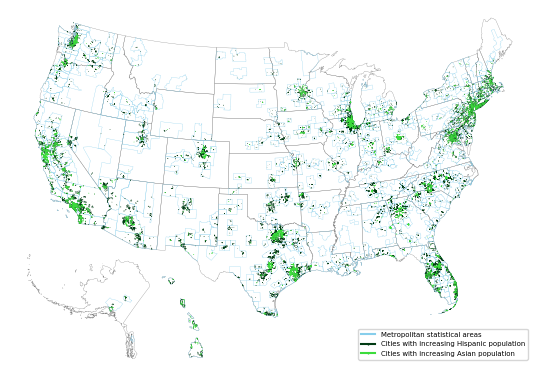

In [32]:
# fig, ax = plt.subplots(figsize=(20, 20))
# create an axis with 2 insets − this defines the inset sizes
df_plot = df3#.set_index('STATEFP')

# create an axis with 2 insets − this defines the inset sizes
mm = 1/(10* 2.54)  # milimeters in inches

fig, continental_ax = plt.subplots(figsize=(140*mm, 120*mm))
alaska_ax = continental_ax.inset_axes([.01, .01, .28, .30])
hawaii_ax = continental_ax.inset_axes([.20, .01, .25, .24])

# Set bounds to fit desired areas in each plot
continental_ax.set_xlim(-2257388.37, 2695859.75)
continental_ax.set_ylim(-2546944.04, 808080.9)

alaska_ax.set_xlim(-4383115.86156959, -1515327.22537998)
alaska_ax.set_ylim(1458524.37417163, 3919523.37426209)

hawaii_ax.set_xlim(-5812090.887043, -5452538.83170424)   # complete bounds 
hawaii_ax.set_ylim(-1064618.58269969, -431238.37803499)

h_color = '#013b14' # '#75984d' #'#a1d99b'
a_color = '#3cdc3c' # '#31a354'

US_states.to_crs('EPSG:9311').boundary.plot(ax =continental_ax, edgecolor = 'grey', linewidth = 0.2)
# US_urban.to_crs('EPSG:9311').plot(ax =continental_ax, color = 'darkblue', linewidth = 0.5, alpha = 0.8,)# legend = True) # 'coral'
# draw outlines of MSA
immigration_data.to_crs('EPSG:9311').boundary.plot(ax= continental_ax, color ='skyblue', alpha = 1, linewidth = 0.2)
df_plot[df_plot['%c_Hispanic'] * df_plot['%ImmPop'] > 10].to_crs('EPSG:9311').boundary.plot(ax = continental_ax, 
                                                                                            alpha = 1, color = h_color, 
                                                                                            linewidth = 0.2)#, legend = True)
df_plot[df_plot['%c_Asian'] * df_plot['%ImmPop'] > 10].to_crs('EPSG:9311').boundary.plot(ax = continental_ax, 
                                                                                         alpha = 1, color = a_color, 
                                                                                         linewidth = 0.2)#, legend = True)

from matplotlib import lines
continental_ax.legend([
    # lines.Line2D([0], [0], marker='s', ls='solid', c='darkblue'),
    lines.Line2D([0], [0], ls='solid', c='skyblue'),
    lines.Line2D([0], [0], marker='s', ls='solid', c=h_color, markersize=0.5),
    lines.Line2D([0], [0], marker='s', ls='solid', c=a_color, markersize=0.5)],
    ['Metropolitan statistical areas', 'Cities with increasing Hispanic population', 'Cities with increasing Asian population'], 
    loc = 'lower right', fontsize = 5)

# Add title and legend to plot
# ax.legend()
# continental_ax.set_title('Cities with higher international immigration inside Metro areas', fontdict={'fontsize': 22})
continental_ax.set_axis_off()

US_states.to_crs('EPSG:9311').boundary.plot(ax =alaska_ax, edgecolor = 'grey', linewidth = 0.2)
# US_urban.to_crs('EPSG:9311').plot(ax =alaska_ax, color = 'darkblue', linewidth = 0.5)#, alpha = 0.8, legend = True)
immigration_data.to_crs('EPSG:9311').boundary.plot(ax= alaska_ax, color ='skyblue', alpha = 1, linewidth = 0.2)
df_plot[df_plot['%c_Hispanic'] * df_plot['%ImmPop'] > 10].to_crs('EPSG:9311').boundary.plot(ax = alaska_ax, 
                                                                                            alpha = 1, color = h_color, 
                                                                                            linewidth = 0.2)#, legend = True)
df_plot[df_plot['%c_Asian'] * df_plot['%ImmPop'] > 10].to_crs('EPSG:9311').boundary.plot(ax = alaska_ax, 
                                                                                         alpha = 1, color = a_color, 
                                                                                         linewidth = 0.2)#, legend = True)
# alaska_ax.set_axis_off()

US_states.to_crs('EPSG:9311').boundary.plot(ax =hawaii_ax, edgecolor = 'grey', linewidth = 0.2)
# US_urban.to_crs('EPSG:9311').plot(ax =hawaii_ax, color = 'darkblue', linewidth = 0.5)#, alpha = 0.8, legend = True)
immigration_data.to_crs('EPSG:9311').boundary.plot(ax=hawaii_ax, color ='skyblue', alpha = 1, linewidth = 0.2)
df_plot[df_plot['%c_Hispanic'] * df_plot['%ImmPop'] > 10].to_crs('EPSG:9311').boundary.plot(ax = hawaii_ax, 
                                                                                            alpha = 1, color = h_color,
                                                                                            linewidth = 0.2)#, legend = True)
df_plot[df_plot['%c_Asian'] * df_plot['%ImmPop'] > 10].to_crs('EPSG:9311').boundary.plot(ax = hawaii_ax, 
                                                                                         alpha = 1, color = a_color, 
                                                                                         linewidth = 0.2)#, legend = True)
# hawaii_ax.set_axis_off()

# remove ticks
for ax in [continental_ax, alaska_ax, hawaii_ax]:
    ax.set_yticks([])
    ax.set_xticks([])
    ax.axis('off')
    plt.axis('off') 
    plt.tight_layout() 

plt.show()
fig.patch.set_visible(False)
fig.savefig(r'D:\Work\Box Sync\NC Figures\Cities with higher international immigration_0.png', dpi = 300,
           bbox_inches='tight', transparent="True", pad_inches=0)
fig.savefig(r'D:\Work\Box Sync\NC Figures\Cities with higher international immigration_0.pdf', dpi = 300,
           bbox_inches='tight', transparent="True", pad_inches=0)

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(28,18))
column_names = ['Hispanic or Latino_10_16','Hispanic or Latino_17_20']
df_comb = df3 
title_dict = {column_names[0]: 'Before',
              column_names[1]:'Recent'}

for ax,col in zip(ax.flatten(), column_names):
    xlim = ([-2257388.37, 2695859.75]) 
    ylim = ([-2246944.04, 918095.9])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    #cmap_colors = matplotlib.colors.ListedColormap(colors)
    base = US_states.to_crs('EPSG:9311').boundary.plot(ax =ax, edgecolor = 'lightgray', linewidth = 0.5)
    df_comb.plot(ax =ax, column = col,  legend = True,legend_kwds={'shrink': 0.3})
    ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
    ax.set_title(title_dict.get(col), fontsize=22, pad=10)